<a href="https://colab.research.google.com/github/Ramana5564/Descriptive-Analysis-on-Diabetes-Data/blob/main/APALABDA1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Performing Decision Tree on Diabetes dataset**

---



**Importing Libraries**
---




1.   Pandas
2.   Numpy
3.   Matplotlib
4.   Seaborn
5.   Sklearn



In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.tree import plot_tree

**Reading DIABETES DATA**
---
---



In [39]:
diabetes_data=pd.read_csv("/content/diabetes.csv")
diabetes_data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


* **Dataset contains 768 rows and 9 columns**

In [40]:
diabetes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


**1.List Column Names**
---
---



In [41]:
column_names = diabetes_data.columns
print(column_names)

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')


* **Dataset Features :**

  1.   Pregnancies
  2.   Glucose
  3.   BloodPressure
  4.   SkinThickness
  5.   Insulin
  6.   BMI
  7.   DiabetesPedigreeFunction
  8.   Age
  9.   Outcome



**2.Check if there are any null values present in the dataset. If present, drop them.**
---
---



In [42]:
null_values = diabetes_data.isna()
print(null_values)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin    BMI  \
0          False    False          False          False    False  False   
1          False    False          False          False    False  False   
2          False    False          False          False    False  False   
3          False    False          False          False    False  False   
4          False    False          False          False    False  False   
..           ...      ...            ...            ...      ...    ...   
763        False    False          False          False    False  False   
764        False    False          False          False    False  False   
765        False    False          False          False    False  False   
766        False    False          False          False    False  False   
767        False    False          False          False    False  False   

     DiabetesPedigreeFunction    Age  Outcome  
0                       False  False    False  
1  


* **We can't really get any insight regarding the above output. So we need to modify the code so that we can see whether there are any null values in the dataset.**



In [43]:
diabetes_data.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64



*   There are no NULL values in the dataset



**3. Check if there are 0 values present in any column. Decide whether 0 values are allowed for those columns. (Hint: “Null values” in disguise). If not allowed, how should they be treated?**
---

---



In [44]:
columns_with_zeros = diabetes_data.columns[diabetes_data.eq(0).any()]
print(columns_with_zeros)

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'Outcome'],
      dtype='object')


* We have so many columns having 0 values(Null Values in Disguise).
* We have 7 features having value "0" out of 9 features.
* To do the descriptive analysis and decision tree we should change those "0" values to either Mean or median or mode.

**Null value replacement using mean or median value?**
---

---
* Replacing Null values for categorical values is different when compared to replacing null values for numerical values.
* We can replace null values of categorical values with mode.
* But confusion arises when the values are numerical.
* It can be replaced with either Median or Mode.





**Dataset Distribution**
---
---
1. Normal Distribution
2. Skewed Distribution


**Choosing Median or Mode**
---
---
* Mean is directly affected by outliers , if the dataset is a normal distribution then it means that there is no outliers in the data. So we can happily use mean to replace null values.
* If the dataset is right skewed or left skewed distribution, we can take median to replace the null values.


**Checking Distribution**
---
---
* We will now check the distribution of each data so that we will find the mean or median to replace the null values

<ipython-input-45-a5115e66edc3>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(diabetes_data['Pregnancies'])


<Axes: xlabel='Pregnancies', ylabel='Density'>

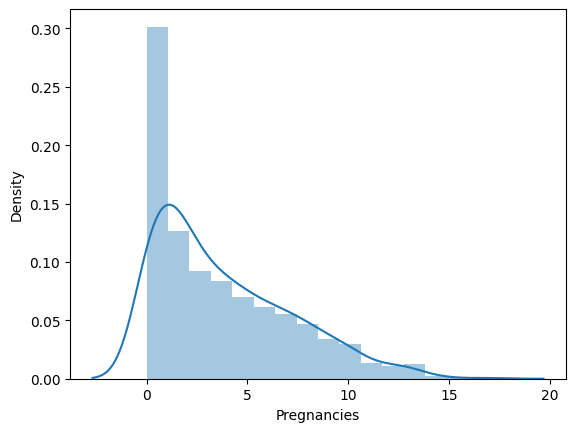

In [45]:
sns.distplot(diabetes_data['Pregnancies'])

<ipython-input-46-0de11ac6c736>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(diabetes_data['Glucose'])


<Axes: xlabel='Glucose', ylabel='Density'>

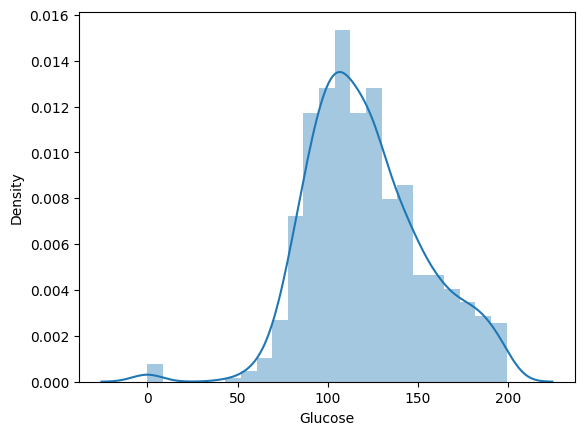

In [46]:
sns.distplot(diabetes_data['Glucose'])

<ipython-input-47-6da8c132cc8b>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(diabetes_data['BloodPressure'])


<Axes: xlabel='BloodPressure', ylabel='Density'>

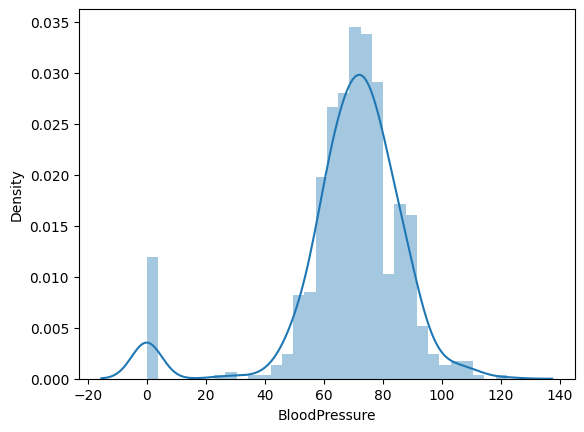

In [47]:
sns.distplot(diabetes_data['BloodPressure'])

<ipython-input-48-a744d5da0ef8>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(diabetes_data['SkinThickness'])


<Axes: xlabel='SkinThickness', ylabel='Density'>

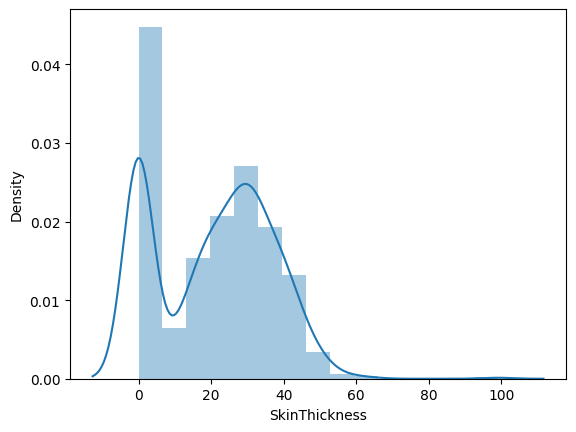

In [48]:
sns.distplot(diabetes_data['SkinThickness'])

<ipython-input-49-e238944efe4e>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(diabetes_data['Insulin'])


<Axes: xlabel='Insulin', ylabel='Density'>

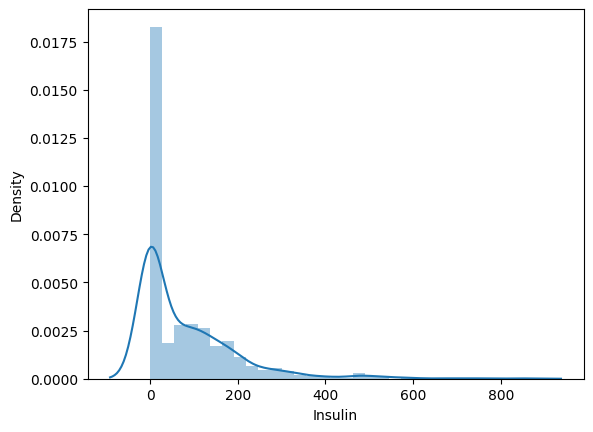

In [49]:
sns.distplot(diabetes_data['Insulin'])

<ipython-input-50-02d7f368e447>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(diabetes_data['BMI'])


<Axes: xlabel='BMI', ylabel='Density'>

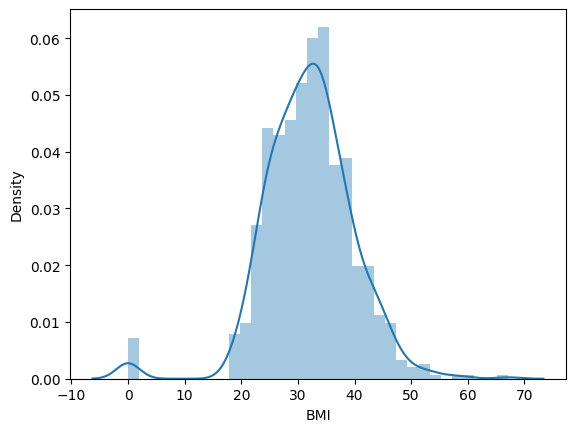

In [50]:
sns.distplot(diabetes_data['BMI'])

<ipython-input-51-c93aa5778974>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(diabetes_data['Outcome'])


<Axes: xlabel='Outcome', ylabel='Density'>

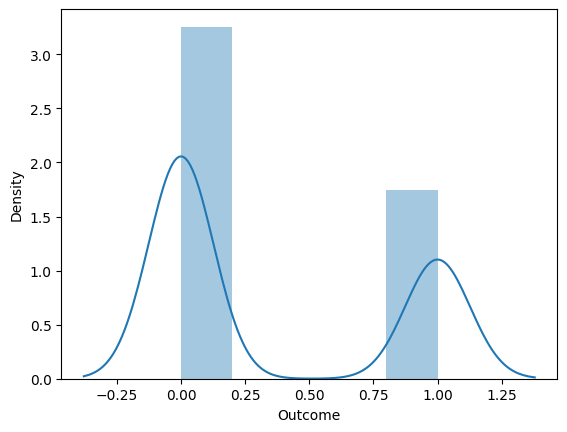

In [51]:
sns.distplot(diabetes_data['Outcome'])

**Dataset Distribution**
---
---

* **Datasets having Normal Distribution**

  1. Glucose
  2. BloodPressure
  3. BMI

* **Datasets having Skewed Distribution**

  1. Pregnancies
  2. SkinThickness
  3. Insulin



* **Note:**
 * Use Mean to replace the null values for normal distribution data
 * Use Median to replace the null values for Skewed distribution data
 * "Outcome" feature having numerical values of 0 and 1. That is actually a binary categorical variable , so we dont need to replace the "0" values because it is not a disguised null values.

In [52]:
# Replace disguised null value for skewed distribution dataset (e.g., replace with median )
diabetes_data['Pregnancies'] = diabetes_data['Pregnancies'].replace(0, diabetes_data['Pregnancies'].median())
diabetes_data['SkinThickness'] = diabetes_data['SkinThickness'].replace(0, diabetes_data['SkinThickness'].median())
diabetes_data['Insulin'] = diabetes_data['Insulin'].replace(0, diabetes_data['Insulin'].median())


In [53]:
# Replace disguised null value for normal distribution dataset (e.g., replace with mean )
diabetes_data['Glucose'] = diabetes_data['Glucose'].replace(0, diabetes_data['Glucose'].mean())
diabetes_data['BloodPressure'] = diabetes_data['BloodPressure'].replace(0, diabetes_data['BloodPressure'].mean())
diabetes_data['BMI'] = diabetes_data['BMI'].replace(0, diabetes_data['BMI'].mean())


* **Now we will check if still there are any disguised null values are present in the dataset**

In [54]:
columns_with_zeros = diabetes_data.columns[diabetes_data.eq(0).any()]
print(columns_with_zeros)

Index(['Outcome'], dtype='object')


* **We are now seeing only "Outcome" feature only as having 0 value but that is not a numerical value , it is a binary categorical variable so we dont need to worry about it.**

#4.List the descriptive statistics for each column.
---

In [55]:
descriptive_statistics = diabetes_data.describe()
print(descriptive_statistics)

       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      4.278646  121.681605      72.254807      27.334635   94.652344   
std       3.021516   30.436016      12.115932       9.229014  105.547598   
min       1.000000   44.000000      24.000000       7.000000   14.000000   
25%       2.000000   99.750000      64.000000      23.000000   30.500000   
50%       3.000000  117.000000      72.000000      23.000000   31.250000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    32.450805                  0.471876   33.240885    0.348958  
std      6.875374                  0.331329   11.760232    0.476951  
min     18.200000                  

#5.Plot histogram for each column.
---

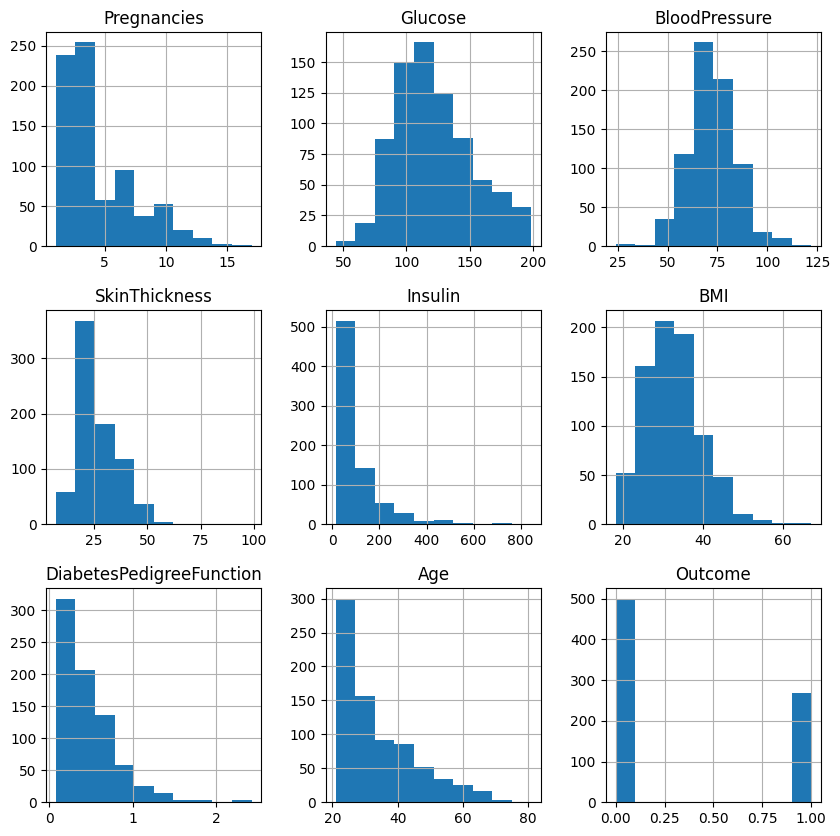

In [56]:
diabetes_data.hist(figsize=(10, 10))
plt.show()

* **Using histplot also we can see the distribution of each dataset.**

#6.Plot pairplot for all features.
---

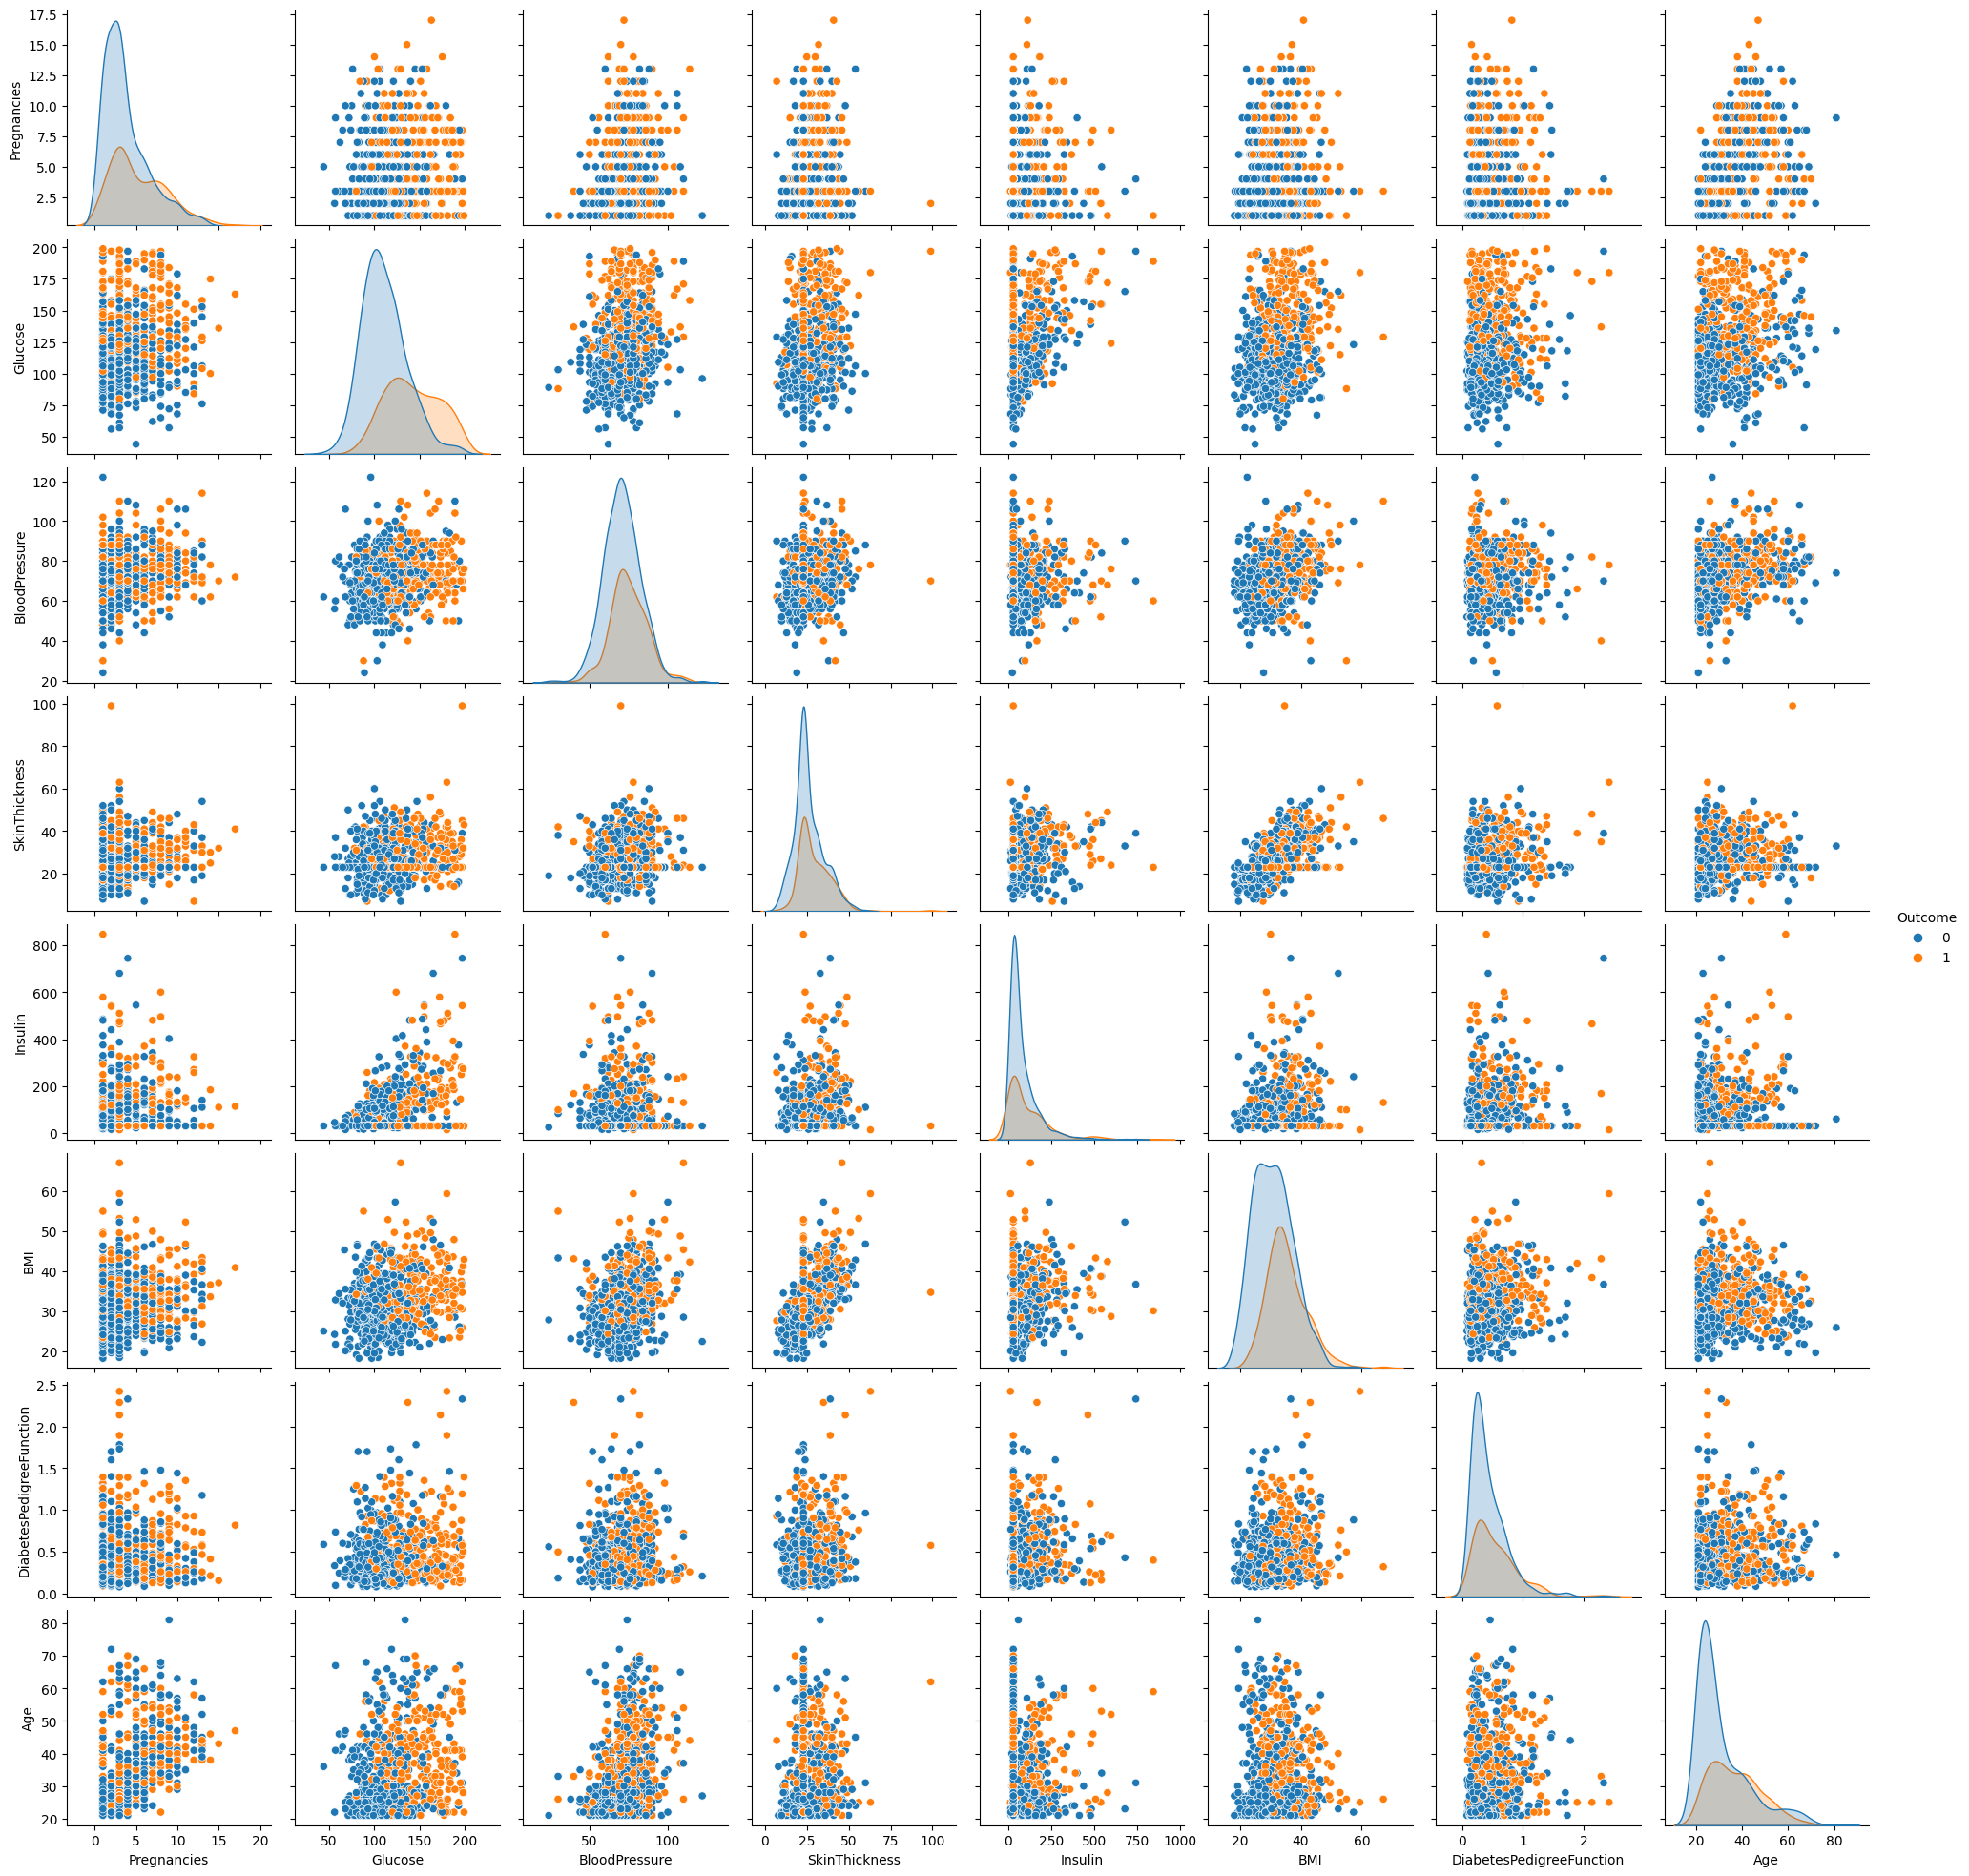

In [57]:
sns.pairplot(diabetes_data, hue='Outcome', diag_kind='kde')
plt.show()

#7.Check if the dataset is balanced or imbalanced
---

In [58]:
data_balance = diabetes_data['Outcome'].value_counts()
print(data_balance)

0    500
1    268
Name: Outcome, dtype: int64


#8.Plot Heat Map with Correlation Coefficient for all features.
---

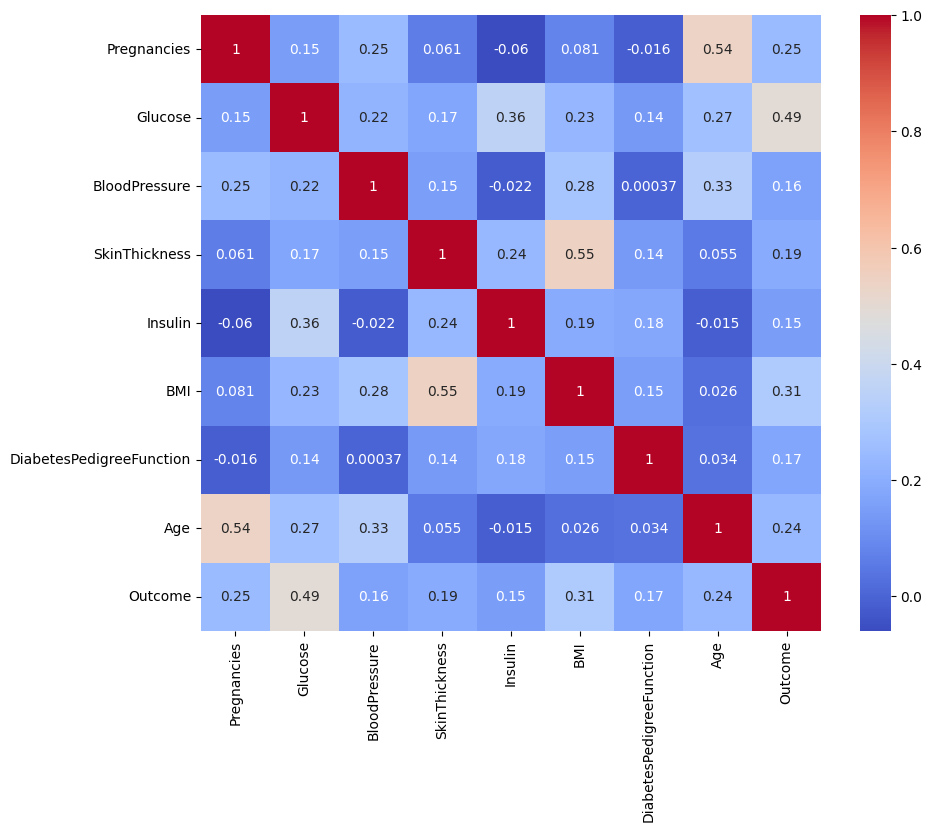

In [59]:
coefficient_matrix = diabetes_data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(coefficient_matrix, annot=True, cmap='coolwarm')
plt.show()

#9.Decide if encoding is needed for any feature.
---

* **Based on the dataset, it appears that no encoding is needed as all the features are already numerical.**

#10.Perform the Standard Scaling of the data.
---

In [60]:
scaler = StandardScaler()
data_scaling = scaler.fit_transform(diabetes_data.drop('Outcome', axis=1))

#11.Split the data (Input-Output)
---

In [61]:
X = data_scaling
y = diabetes_data['Outcome']

#12.Split the data (Train-Test: 80-20).
---

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=95)

#13.Build a Decision Tree Classifier and train it.
---

In [63]:
classifier = DecisionTreeClassifier(random_state=95)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(random_state=95)

#14.Visualize the Decision Tree.
---

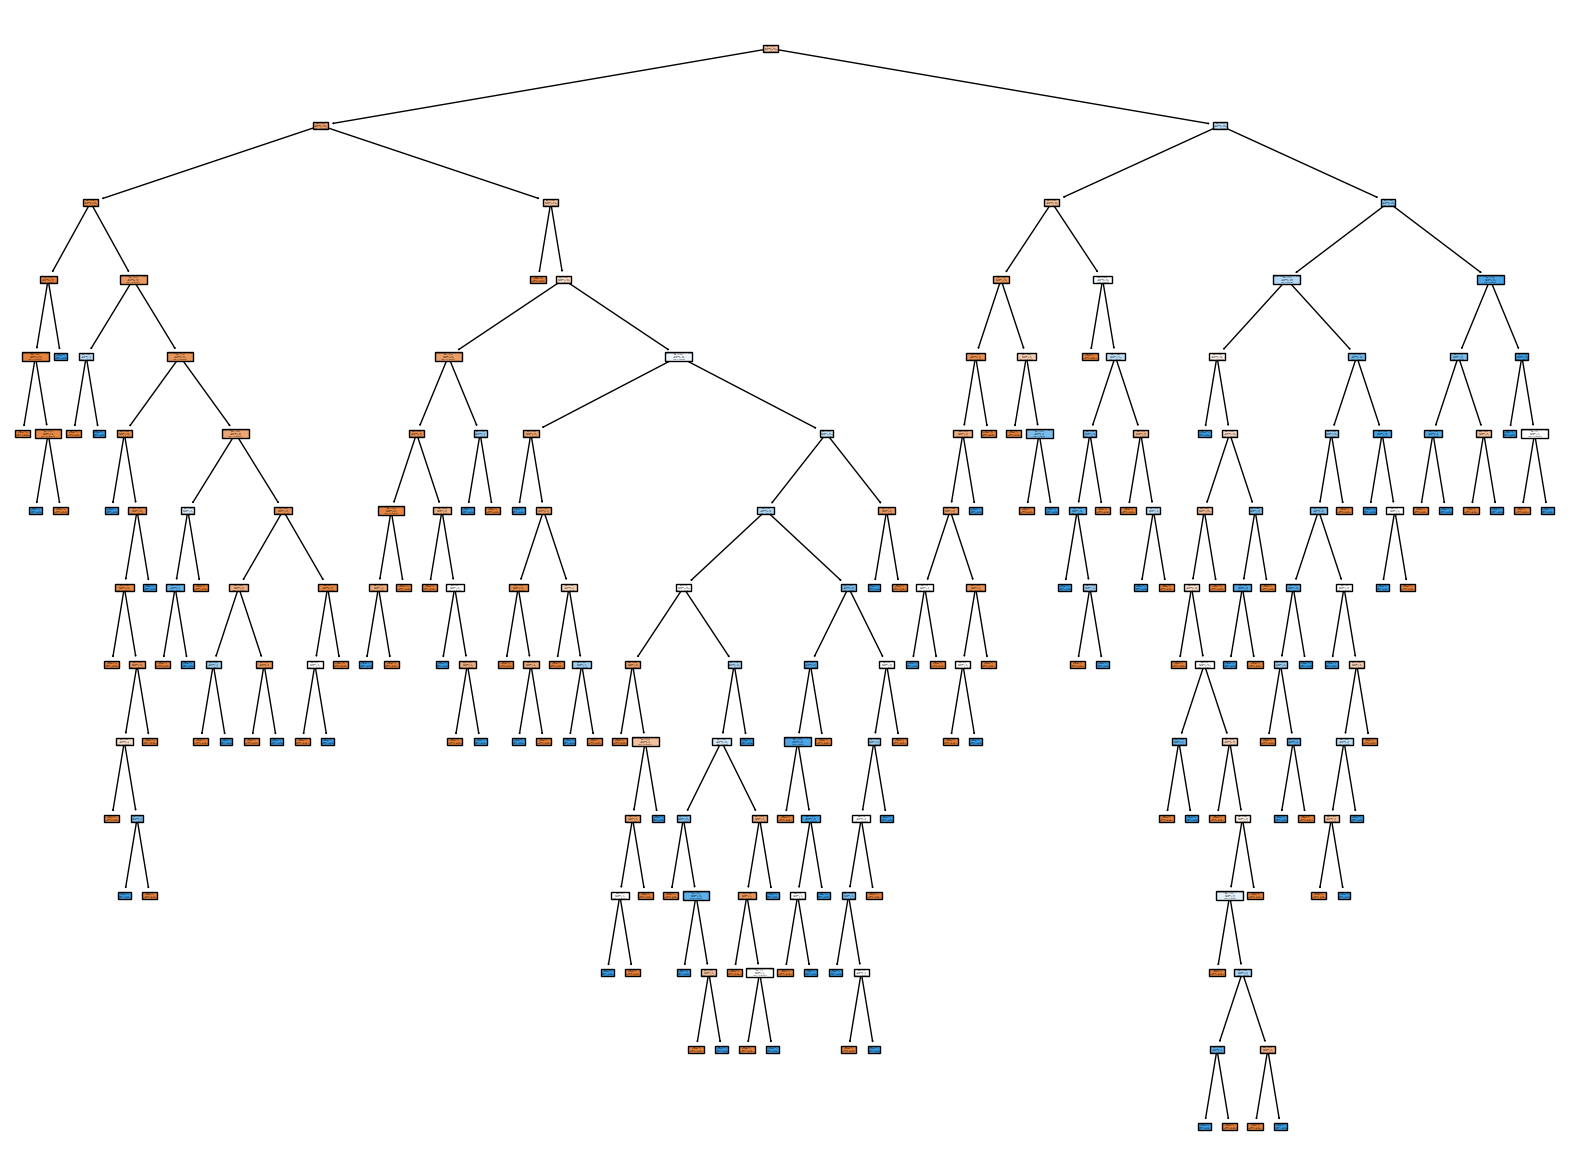

In [64]:
plt.figure(figsize=(20, 15))
plot_tree(classifier, feature_names=diabetes_data.columns[:-1], class_names=["No Diabetes", "Diabetes"], filled=True)
plt.show()

#15.Evaluate the Decision Tree: print confusion matrix and classification report.
---

In [65]:
y_pred = classifier.predict(X_test)
confusion_matrix = confusion_matrix(y_test, y_pred)
classification_report = classification_report(y_test, y_pred)
print("Confusion Matrix:", confusion_matrix)
print("\nClassification Report:", classification_report)

Confusion Matrix: [[83 17]
 [24 30]]

Classification Report:               precision    recall  f1-score   support

           0       0.78      0.83      0.80       100
           1       0.64      0.56      0.59        54

    accuracy                           0.73       154
   macro avg       0.71      0.69      0.70       154
weighted avg       0.73      0.73      0.73       154

